# Liveness vs Popularity

I want to investigate the correlation between the popularity of a song and the genre and wether its a live song or studio.

Before we investigate its worth explaining how the dataset uses track_gere, liveness.

In the dataset, track_genre: The genre in which the track belongs and liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. 

## EDA

In [35]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# Import dataset
df = pd.read_csv('tracks.csv')
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,85,202093,True,0.658,0.671,2,-12.210,1,0.0363,0.09330,0.000927,0.1150,0.166,100.966,4,club
1,49,215973,False,0.627,0.505,6,-12.659,1,0.0549,0.19700,0.014900,0.0583,0.146,100.005,4,club
2,65,188160,False,0.807,0.835,9,-6.849,0,0.0631,0.00148,0.527000,0.2330,0.349,124.979,4,club
3,59,233965,False,0.748,0.549,6,-5.447,0,0.0650,0.00268,0.792000,0.1960,0.197,101.033,4,club
4,55,187173,False,0.683,0.869,0,-4.828,1,0.0515,0.00088,0.836000,0.2060,0.219,123.983,4,club


In [37]:
df.tail()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1495,23,352371,False,0.273,0.122,0,-22.173,0,0.0575,0.960,0.003330,0.0635,0.0731,117.718,4,opera
1496,22,204310,False,0.457,0.498,6,-8.387,1,0.0368,0.766,0.000002,0.2890,0.2020,116.255,4,opera
1497,23,225506,False,0.241,0.207,1,-16.353,1,0.0374,0.982,0.002260,0.1140,0.0735,86.885,1,opera
1498,23,148600,False,0.280,0.208,5,-20.158,1,0.0521,0.941,0.000200,0.4100,0.2410,90.477,4,opera
1499,23,257800,False,0.244,0.205,3,-15.596,1,0.0367,0.984,0.329000,0.0788,0.0750,71.370,4,opera


No columns need to be removed.

In [38]:
df.isna().sum()

popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [39]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,28.554000,209746.921333,0.541069,0.594378,5.043333,-8.312037,0.654000,0.077477,0.347930,0.166602,0.194847,0.378548,116.924497,3.880000
std,24.038587,67423.126723,0.206632,0.261282,3.522744,5.552970,0.475852,0.080272,0.376654,0.310986,0.167316,0.246329,28.885636,0.466632
min,0.000000,40266.000000,0.060100,0.005680,0.000000,-39.219000,0.000000,0.024400,0.000003,0.000000,0.028200,0.024700,51.096000,0.000000
25%,1.000000,173061.000000,0.381000,0.397750,2.000000,-9.887750,0.000000,0.036300,0.024600,0.000000,0.096900,0.167000,95.244750,4.000000
50%,25.000000,203506.000000,0.572500,0.647500,5.000000,-6.458500,1.000000,0.046400,0.143000,0.000117,0.127000,0.338500,115.082000,4.000000
75%,47.000000,238861.500000,0.695000,0.813000,8.000000,-4.723500,1.000000,0.076000,0.756000,0.090775,0.224250,0.575500,132.016500,4.000000
max,93.000000,879905.000000,0.957000,0.996000,11.000000,0.366000,1.000000,0.859000,0.996000,0.983000,0.987000,0.965000,213.928000,5.000000


Next we can check for outliers

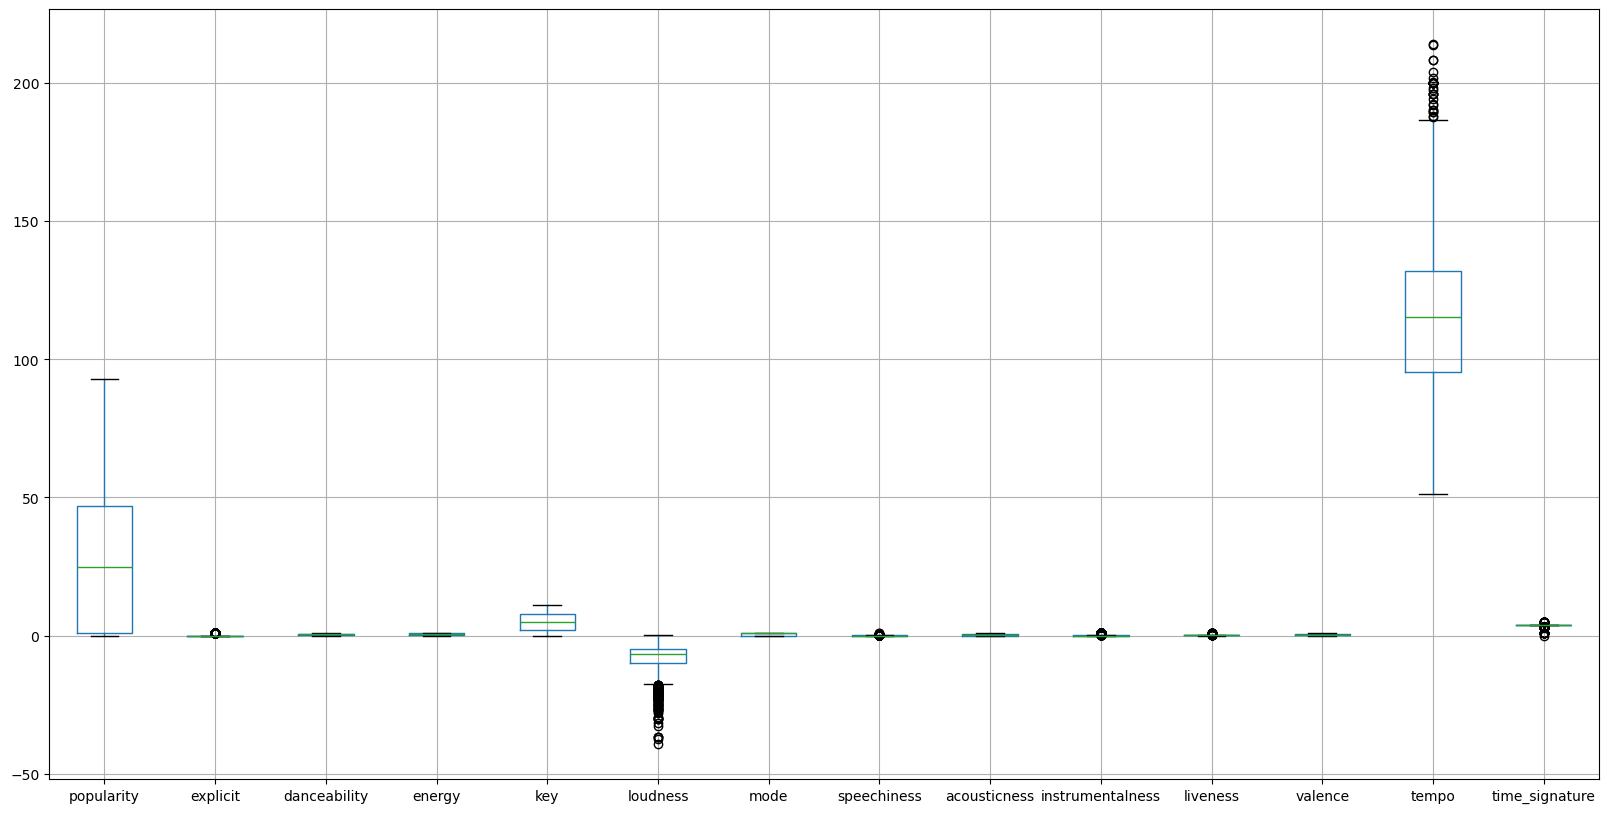

In [40]:

# Dropping 'duration_ms' since the mean is 209746 which would significantly sk  ew the graph.
df.drop(columns='duration_ms').boxplot(figsize=(20, 10))
plt.show()

The following columns contain outliers:  
`explicit`- which doesnt count as its binary  
`loudness`  
`speechiness`  
`instrumentalness`  
`liveness`  
`tempo`  
`time signature`

`loudness` and `tempo` contain some extreme outliers, suggesting the presence of both quiet, and quick songs.

In [41]:
df.skew(numeric_only=True).sort_values(ascending=False)


speechiness         3.467505
explicit            2.585422
liveness            2.343645
duration_ms         2.230314
instrumentalness    1.580077
acousticness        0.657867
tempo               0.594090
valence             0.418549
popularity          0.399054
key                 0.156664
danceability       -0.272588
energy             -0.545246
mode               -0.648124
loudness           -1.901944
time_signature     -3.312858
dtype: float64

Anything between 1 and -1 is considered not skewed.  

We can see that the following are right skewed:  
`speechiness`  
`explicit`  
`liveness`  
`duration_ms`  
`instrumentalness`  

And the following are left skewed:  
`loudness`  
`time_signature`  

Everything else is considered symetric.

### Further exploring
We can also factor in keys to see if ay keys are morepopular in live music vs studio. 
The most popular genre is club. 




<Figure size 1200x600 with 0 Axes>

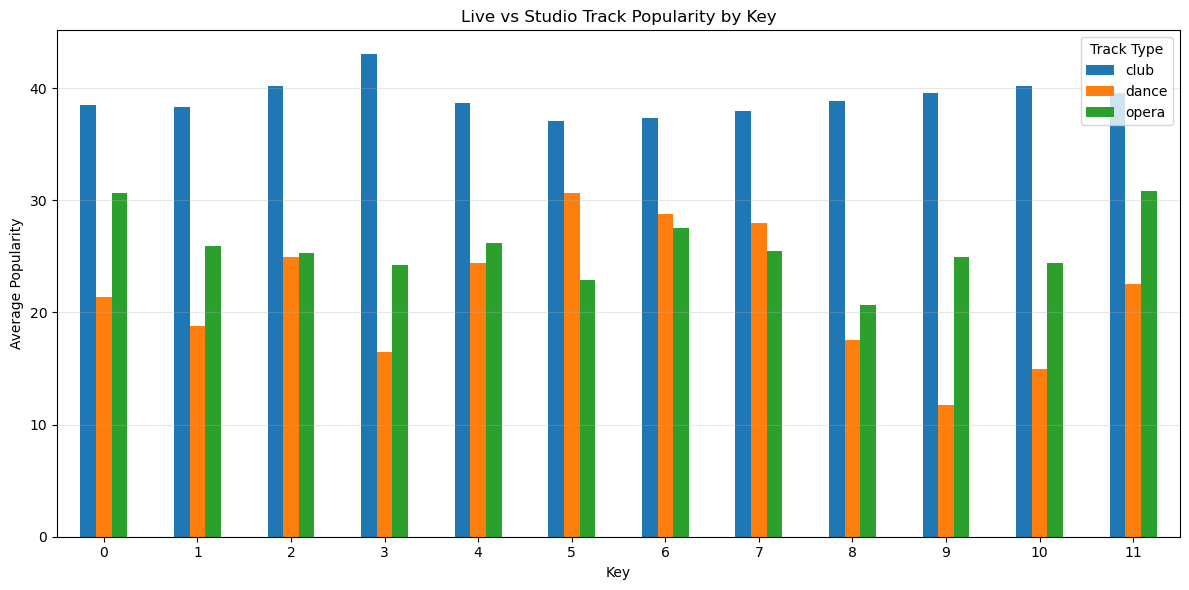

In [51]:
# Comparing live vs studio popularity across different keys
key_type_pop = df.groupby(['key', 'track_genre'])['popularity'].mean().reset_index()
key_type_pop = key_type_pop.pivot(index='key', columns='track_genre', values='popularity')

plt.figure(figsize=(12, 6))
key_type_pop.plot(kind='bar', figsize=(12, 6))
plt.title('Live vs Studio Track Popularity by Key')
plt.xlabel('Key')
plt.ylabel('Average Popularity')
plt.xticks(rotation=0)
plt.legend(title='Track Type')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Exploring further into liveness vs popularity. 

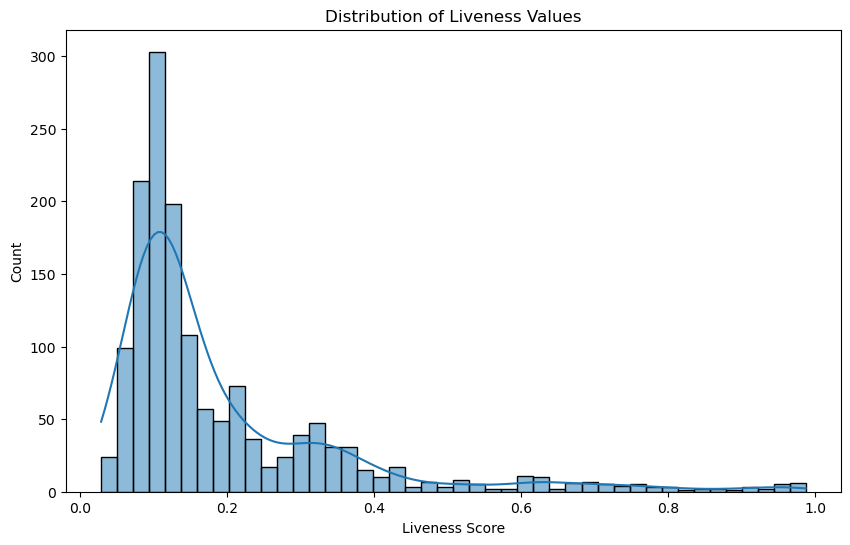

In [ ]:
# Examining the distribution of liveness
plt.figure(figsize=(10, 6))
sns.histplot(df['liveness'], kde=True)
plt.title('Distribution of Liveness Values')
plt.xlabel('Liveness Score')
plt.ylabel('Count')
plt.show()

liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

I am putting the liveness score to 0.6 as that is where the first increase is. 

This graph indicates that there are a few live songs that do really well in populairty but the common theme for most is that they will score less in popularity on average than studio songs. 

Number of tracks in each category:
track_type
Studio    1422
Live        78
Name: count, dtype: int64


C:\Users\03tho\AppData\Local\Temp\ipykernel_1292\417358535.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='track_type', y='popularity', data=df, palette='flare')


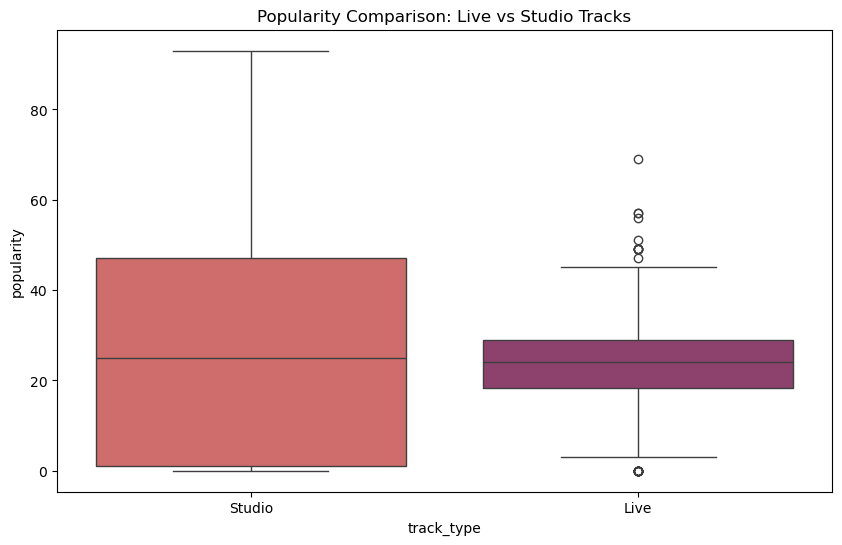

In [ ]:
# Define what constitutes a "live" vs "studio" track
# We'll use a threshold of 0.6 for high liveness (indicating live tracks)
df['track_type'] = df['liveness'].apply(lambda x: 'Live' if x > 0.6 else 'Studio')

# Count how many tracks fall into each category
track_type_counts = df['track_type'].value_counts()
print(f"Number of tracks in each category:\n{track_type_counts}")

# Compare popularity between live and studio tracks
plt.figure(figsize=(10, 6))
sns.boxplot(x='track_type', y='popularity', data=df, palette='flare')
plt.title('Popularity Comparison: Live vs Studio Tracks')
plt.show()

Here we see again that studio songs are preferrable. 

Average popularity by track type:
track_type
Live      24.089744
Studio    28.798875
Name: popularity, dtype: float64


C:\Users\03tho\AppData\Local\Temp\ipykernel_1292\1806347976.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_by_type.index, y=popularity_by_type.values, palette='flare')


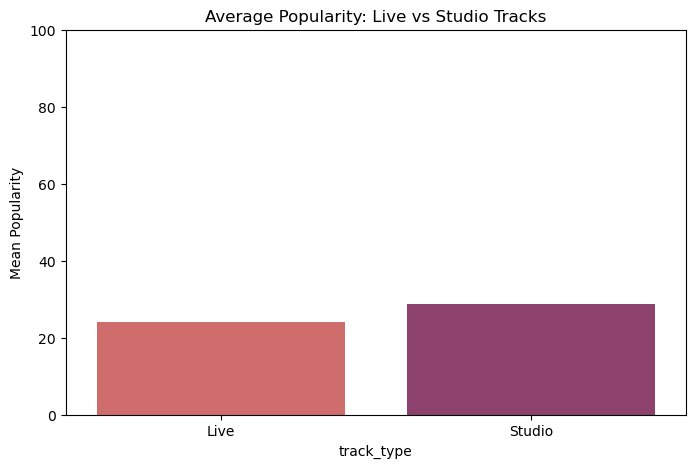

In [ ]:
# Calculate mean popularity for each track type
popularity_by_type = df.groupby('track_type')['popularity'].mean()
print(f"Average popularity by track type:\n{popularity_by_type}")

# Visualize with a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=popularity_by_type.index, y=popularity_by_type.values, palette='flare')
plt.title('Average Popularity: Live vs Studio Tracks')
plt.ylabel('Mean Popularity')
plt.ylim(0, 100)  # Set y-axis to full popularity range for better context
plt.show()

The live ,usic seems to be less popular to studio recordings. 

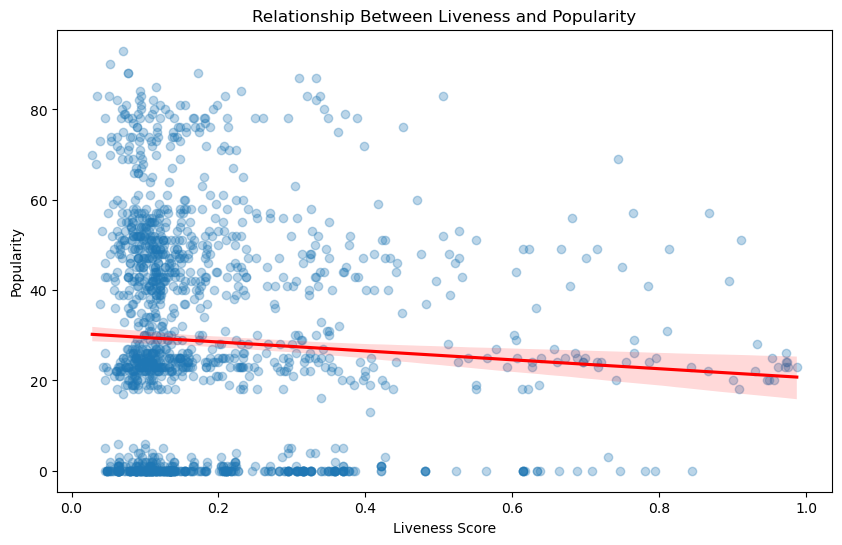

Correlation between liveness and popularity: -0.0687


In [ ]:
# Scatter plot with regression line to show relationship between liveness and popularity
plt.figure(figsize=(10, 6))
sns.regplot(x='liveness', y='popularity', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Relationship Between Liveness and Popularity')
plt.xlabel('Liveness Score')
plt.ylabel('Popularity')
plt.show()

# Calculate and display correlation
correlation = df['liveness'].corr(df['popularity'])
print(f"Correlation between liveness and popularity: {correlation:.4f}")

Opera has more live music as expected. 

C:\Users\03tho\AppData\Local\Temp\ipykernel_1292\1096384490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_genre', y='liveness', data=top_genre_df, palette='flare')


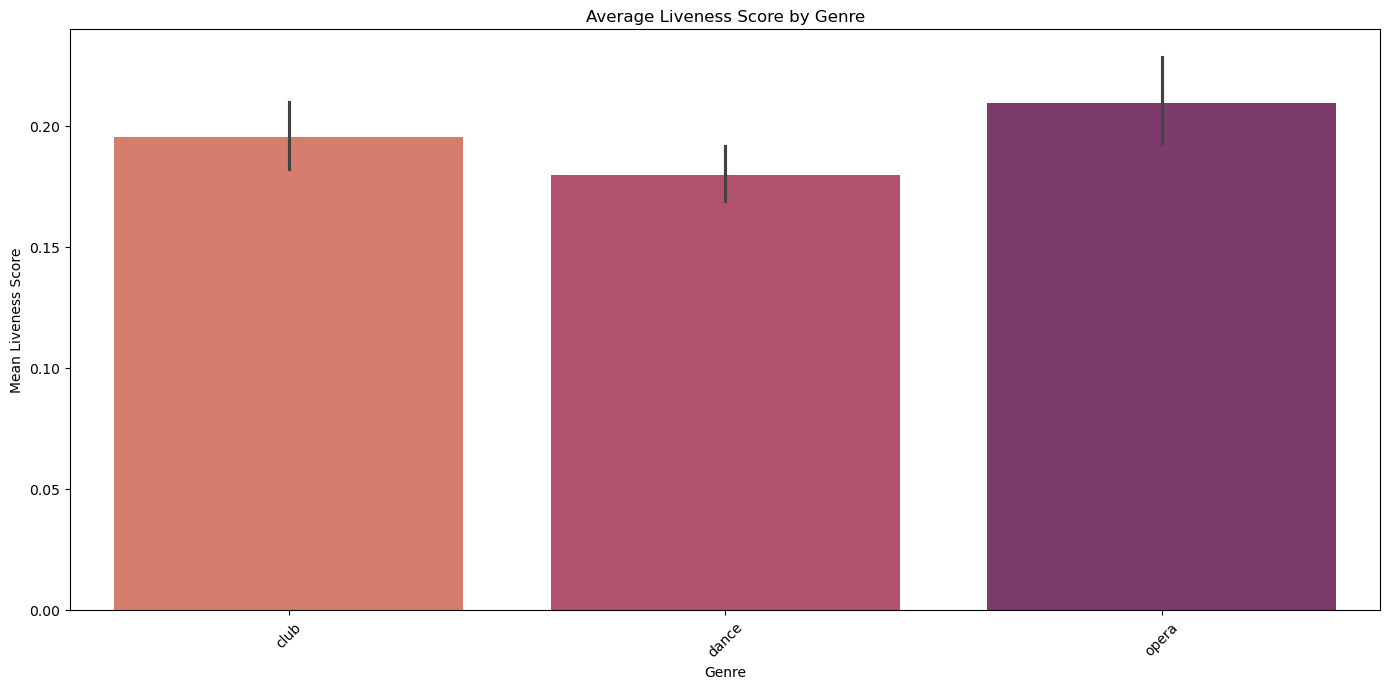

In [ ]:
# Compare average liveness across genres
plt.figure(figsize=(14, 7))
sns.barplot(x='track_genre', y='liveness', data=top_genre_df, palette='flare')
plt.title('Average Liveness Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Liveness Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()